In [ ]:
!git clone https://github.com/getalp/ALFFA_PUBLIC.git

fatal: destination path 'ALFFA_PUBLIC' already exists and is not an empty directory.


In [ ]:
!du -sh ALFFA_PUBLIC/ASR/*

2.5G	ALFFA_PUBLIC/ASR/AMHARIC
824M	ALFFA_PUBLIC/ASR/FONGBE
11M	ALFFA_PUBLIC/ASR/HAUSA
124K	ALFFA_PUBLIC/ASR/LREC2016_DataCollection_And_ALFFA_Project.pdf
1.5G	ALFFA_PUBLIC/ASR/SWAHILI
2.7G	ALFFA_PUBLIC/ASR/WOLOF


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/10x_week_4_dataset"

In [ ]:
!cp -r "ALFFA_PUBLIC/ASR/AMHARIC" "ALFFA_PUBLIC/ASR/SWAHILI" "/content/drive/MyDrive/10x_week_4_dataset/"

In [2]:
!du -sh drive/MyDrive/10x_week_4_dataset/*

2.4G	drive/MyDrive/10x_week_4_dataset/AMHARIC
1.4G	drive/MyDrive/10x_week_4_dataset/SWAHILI


In [1]:
import os
os.chdir("drive/MyDrive/10x_week_4_dataset/AMHARIC")
os.listdir()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'drive/MyDrive/10x_week_4_dataset/AMHARIC'

In [4]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
# from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
def transcription_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8") as f:
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

def meta_data(transcription, path):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for key in transcription:
    filename = path + key + ".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(librosa.get_duration(y=audio, sr=fs))
    label = transcription[key]
    target.append(label)
  return filenames, target, duration_of_recordings

In [6]:
transcriptions_amharic = transcription_loader("data/train/trsTrain.txt")

In [7]:
train_audio_path = 'data/train/wav/'

In [9]:
filenames, target, duration_of_recordings = meta_data(transcriptions_amharic, train_audio_path)

In [10]:
len(filenames)

10875

In [12]:
samples, sample_rate = librosa.load(train_audio_path+'tr_946_tr10047.wav')
print(samples)
print(sample_rate)

[-0.00526112 -0.00587945 -0.00496498 ... -0.00486937 -0.00369575
  0.        ]
22050


In [13]:
audio, rate=librosa.load(train_audio_path+'tr_946_tr10047.wav', sr=44100)

In [14]:
ipd.Audio(samples, rate=sample_rate)

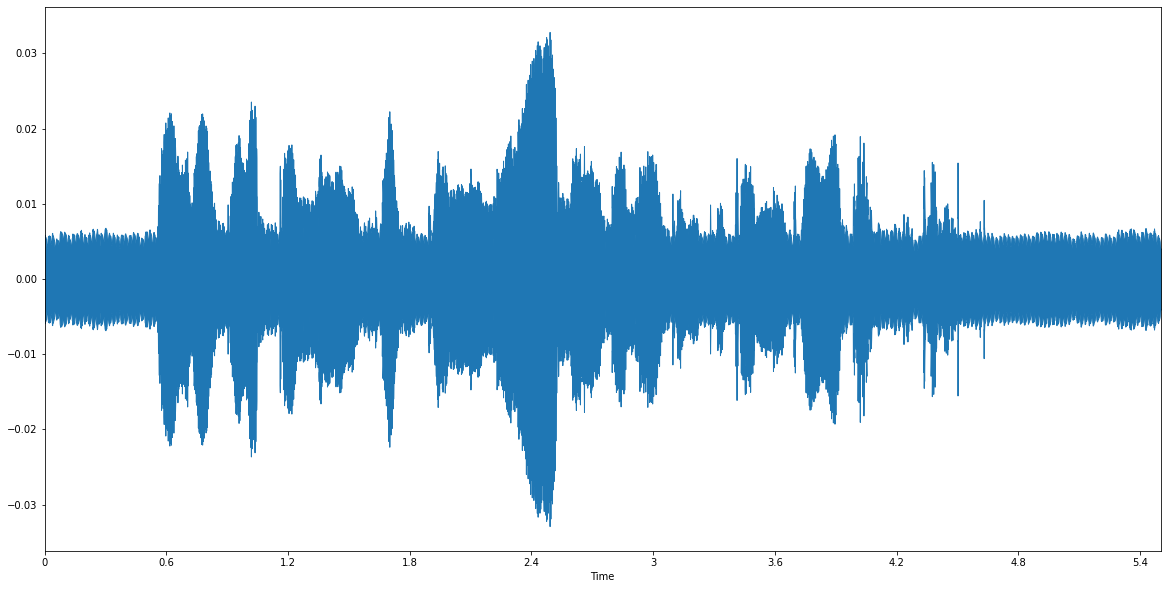

In [15]:
plt.figure(figsize=(20, 10))
librosa.display.waveplot(samples, sr=sample_rate)

In [17]:
data=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [18]:
data.head()

,key,text,duration
0,data/train/wav/tr_1_tr01001.wav,ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል,4.608
1,data/train/wav/tr_2_tr01002.wav,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384
2,data/train/wav/tr_3_tr01003.wav,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592
3,data/train/wav/tr_4_tr01004.wav,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736
4,data/train/wav/tr_5_tr01005.wav,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192
